# House Price Prediction 

This is my First Task For Bharat Intern 
Using Machine Learning to Predict House Prices


This is Regression problem. 
Regression in machine learning is a technique used to capture the relationships between independent and dependent variables, with the main purpose of predicting an outcome. It involves training a set of algorithms to reveal patterns that characterize the distribution of each data point. With patterns identified, the model can then make accurate predictions for new data points or input values.

In [71]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


from warnings import filterwarnings
filterwarnings('ignore')

In [34]:
df=pd.read_csv('1553768847-housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [35]:
df.shape

(20640, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Only ocean_proximity has a dtype of object i.e it has a categorical values 

We need to convert them to numerical 

In [37]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

There are 207 null values in total_bedrooms column

We will take replace it with mean values

In [38]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The mean value for total_bedrooms is 537.87

In [39]:
a = df['total_bedrooms'].mean()

df["total_bedrooms"]=df["total_bedrooms"].fillna(a)

In [40]:
df['total_bedrooms'].isna().sum()

0

Problem of null problems resolved :)

In [41]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

ISLAND has lowest value count and <1H OCEAN has highest value count

In [42]:
columns=df.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

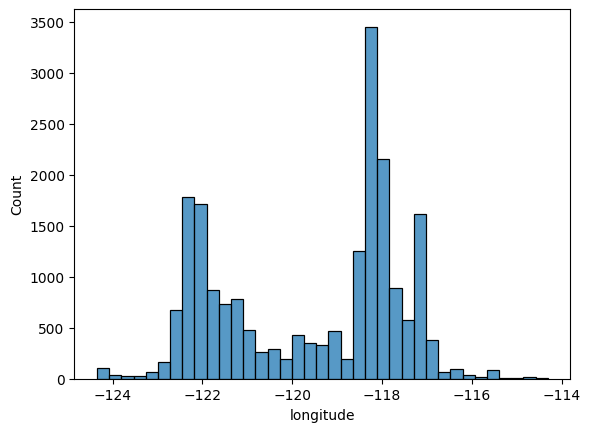

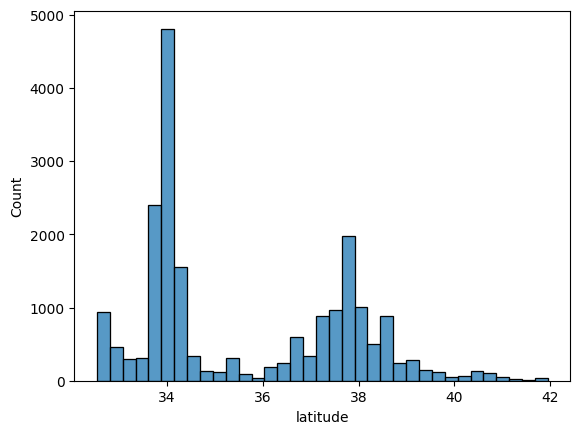

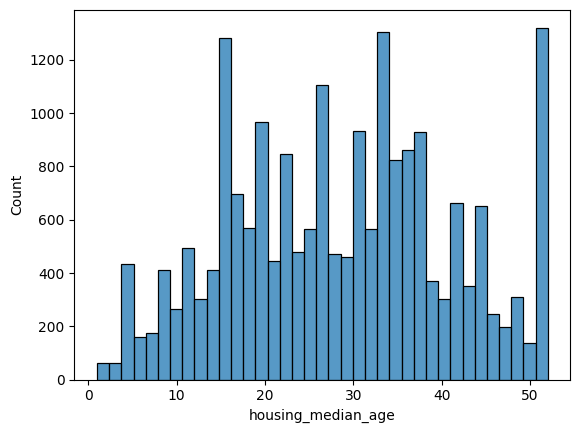

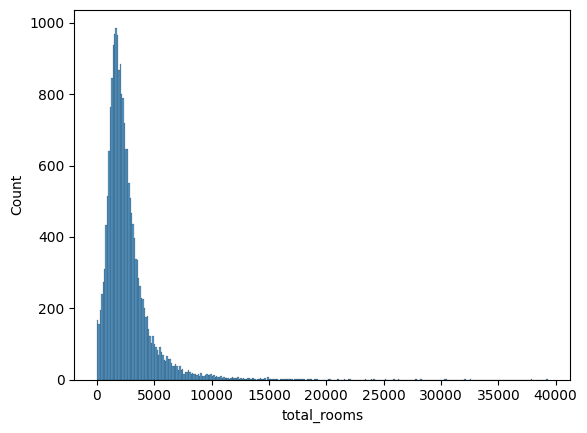

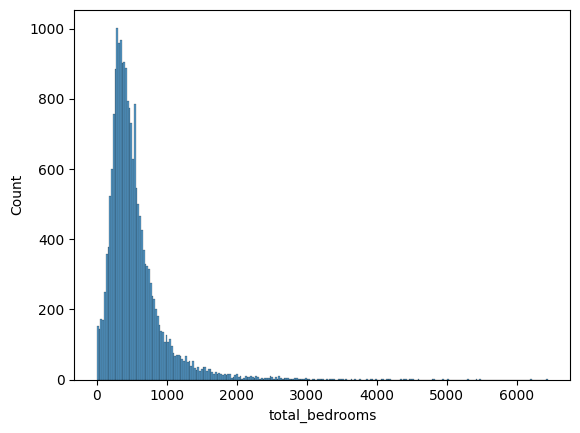

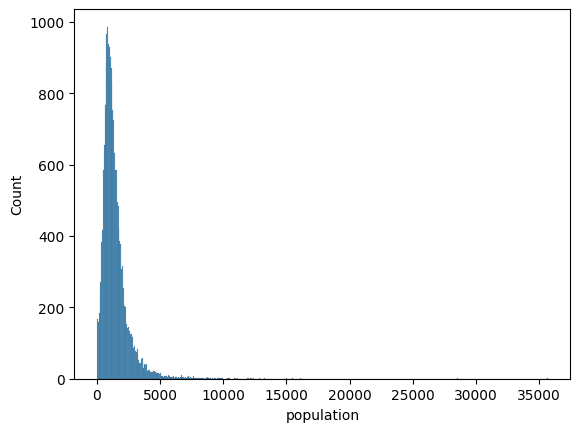

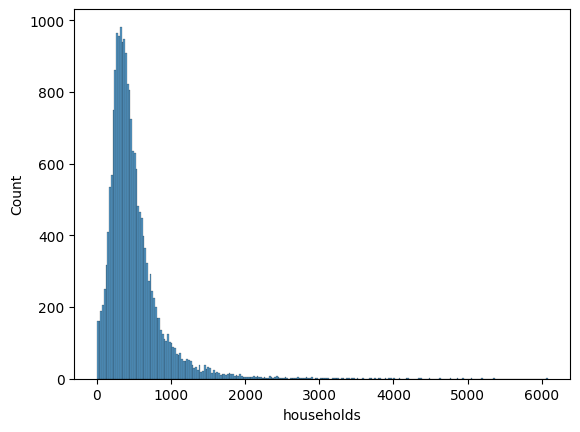

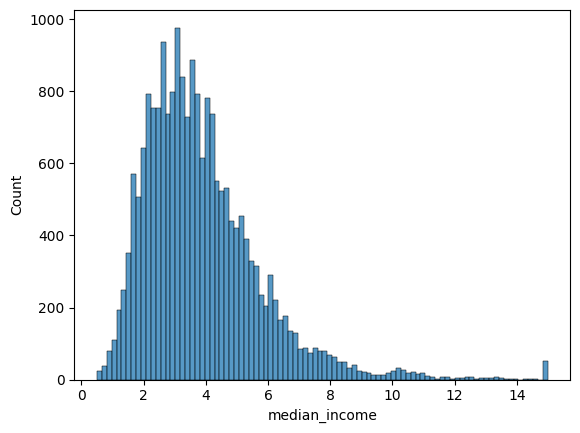

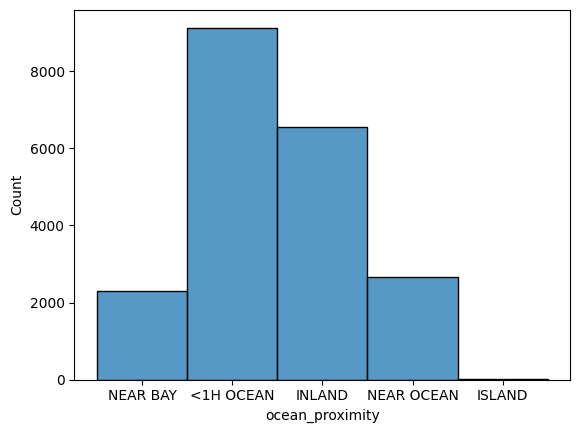

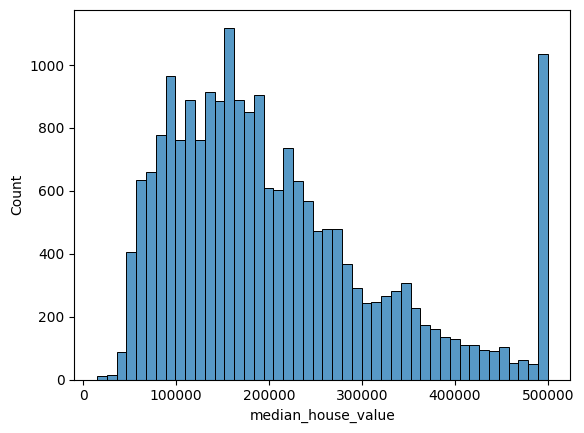

In [43]:

for i in columns:
    sns.histplot(df[i])
    plt.show()

In [44]:
coll=df.drop(['ocean_proximity'],axis=1)

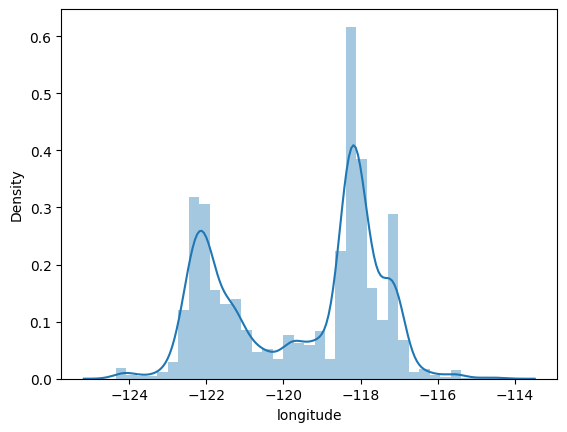

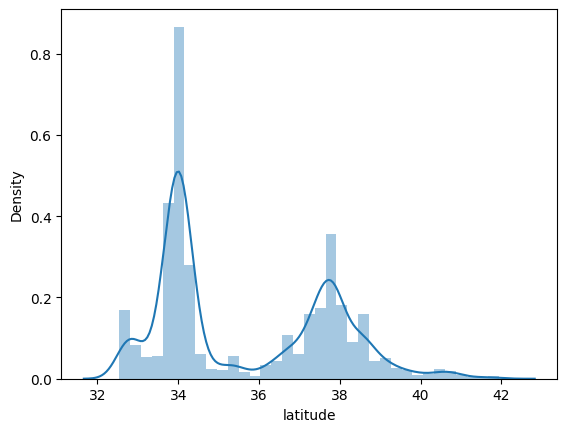

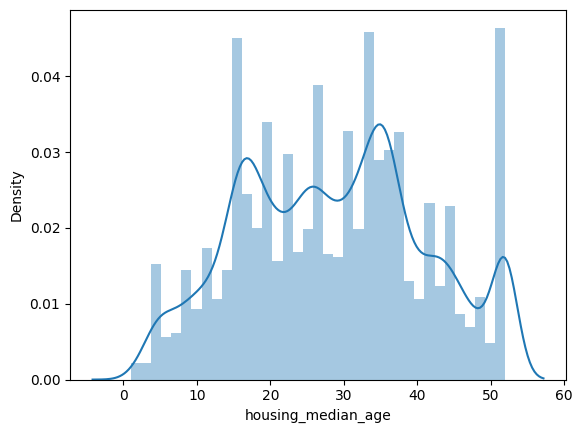

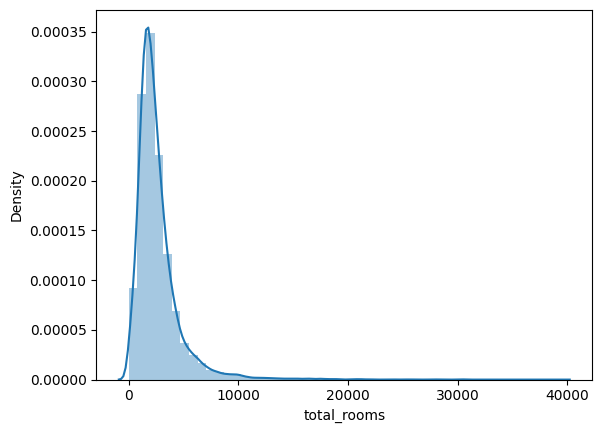

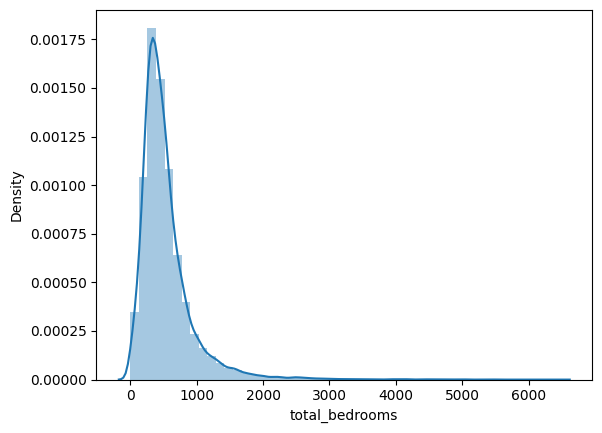

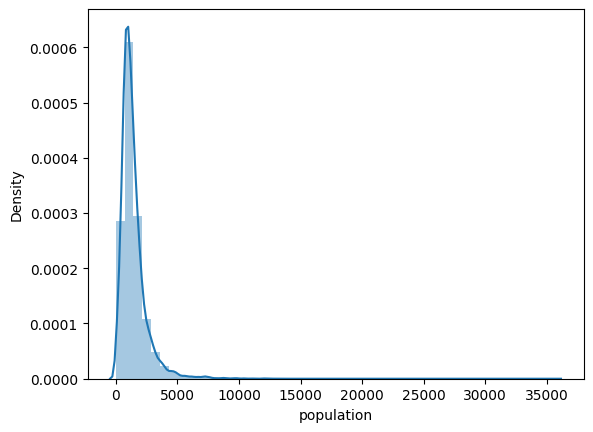

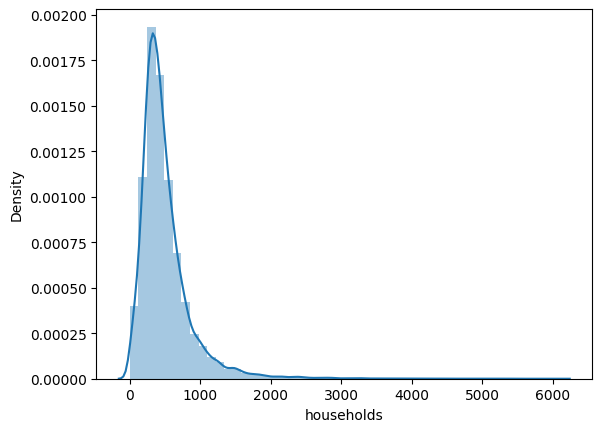

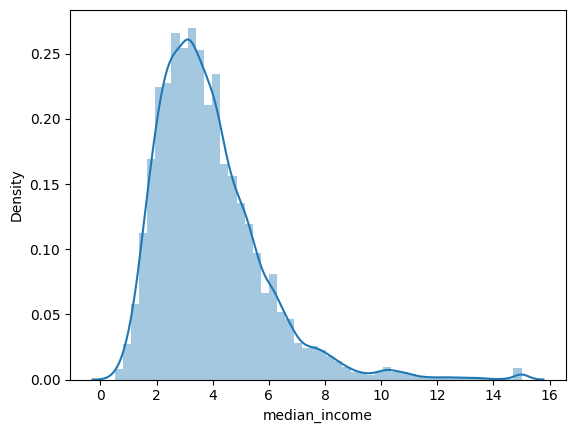

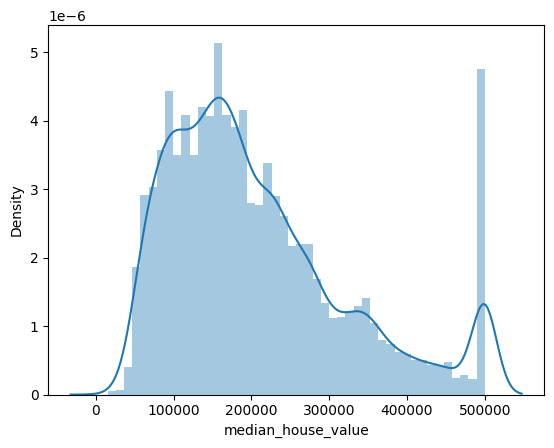

In [45]:
for i in coll:
    sns.distplot(df[i])
    plt.show()

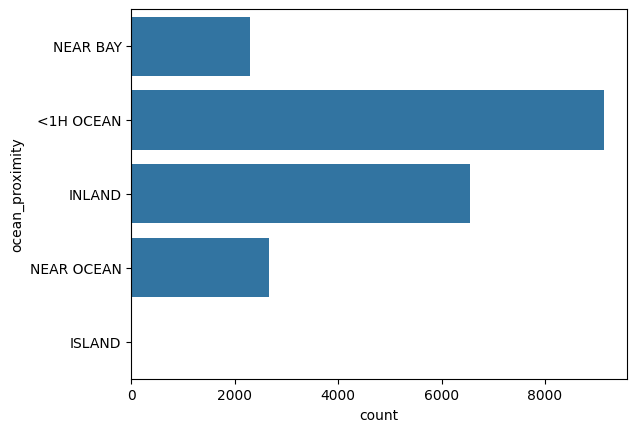

In [46]:
sns.countplot(df['ocean_proximity'])
plt.show()

In [48]:
coll.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477023
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

We can see that dataset is skewed 

We will be performing Scaling to solve this problem 

In [49]:
trans = ['total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [50]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()

df[trans] = scaler.fit_transform(df[trans])

In [52]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,0.022331,0.019863,0.008941,0.020556,0.539668,NEAR BAY,452600
1,-122.22,37.86,21,0.180503,0.171477,0.067210,0.186976,0.538027,NEAR BAY,358500
2,-122.24,37.85,52,0.037260,0.029330,0.013818,0.028943,0.466028,NEAR BAY,352100
3,-122.25,37.85,52,0.032352,0.036313,0.015555,0.035849,0.354699,NEAR BAY,341300
4,-122.25,37.85,52,0.041330,0.043296,0.015752,0.042427,0.230776,NEAR BAY,342200


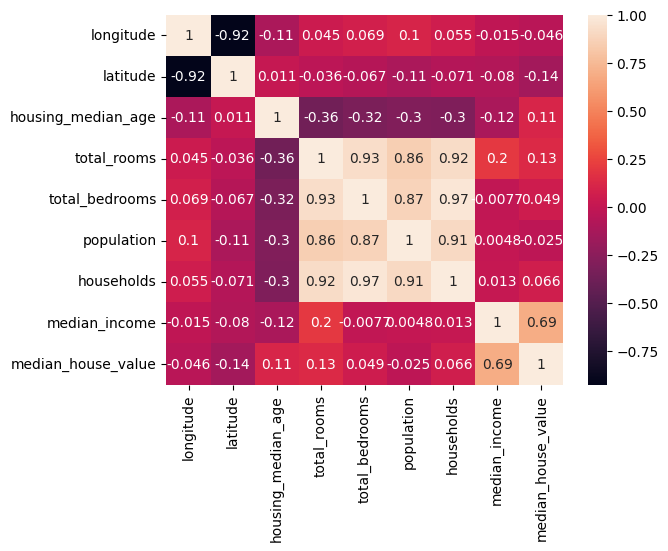

In [51]:
sns.heatmap(coll.corr(),annot=True)
plt.show()

As we have seen above ISLAND in ocean_proximity column has value count of 5 and this could a outlier so we will drop the rows containing value as ISLAND

In [56]:
dff = df[df['ocean_proximity'] != 'ISLAND']

dff.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,0.022331,0.019863,0.008941,0.020556,0.539668,NEAR BAY,452600
1,-122.22,37.86,21,0.180503,0.171477,0.067210,0.186976,0.538027,NEAR BAY,358500
2,-122.24,37.85,52,0.037260,0.029330,0.013818,0.028943,0.466028,NEAR BAY,352100
3,-122.25,37.85,52,0.032352,0.036313,0.015555,0.035849,0.354699,NEAR BAY,341300
4,-122.25,37.85,52,0.041330,0.043296,0.015752,0.042427,0.230776,NEAR BAY,342200


In [59]:
dff.shape

(20635, 10)

5 records were removed from dataset

Data Preparartion

In [96]:
cat = dff.select_dtypes(exclude=np.number).columns.to_list()
fdf = pd.get_dummies(data=dff, columns = cat,drop_first=True)

In [97]:
fdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,0.022331,0.019863,0.008941,0.020556,0.539668,452600,False,True,False
1,-122.22,37.86,21,0.180503,0.171477,0.067210,0.186976,0.538027,358500,False,True,False
2,-122.24,37.85,52,0.037260,0.029330,0.013818,0.028943,0.466028,352100,False,True,False
3,-122.25,37.85,52,0.032352,0.036313,0.015555,0.035849,0.354699,341300,False,True,False
4,-122.25,37.85,52,0.041330,0.043296,0.015752,0.042427,0.230776,342200,False,True,False


In [64]:
y = fdf['median_house_value']
X = fdf.drop('median_house_value',axis=1)

In [65]:
print(X.shape)
print(y.shape)

(20635, 12)
(20635,)


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16508, 12), (4127, 12), (16508,), (4127,))

Model Training

1) Linear Regression Model

In [78]:
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

#predictions and metrics 
lr_preds=lr.predict(X_test)
lr_mse=mean_squared_error(y_test,lr_preds)
lr_rmse=lr_mse**0.5
lr_r2=r2_score(y_test,lr_preds)
lr_mae=mean_absolute_error(y_test,lr_preds)

print('LR_MSE= ',lr_mse)
print('LR_RMSE= ',lr_rmse)
print('LR_R2_score= ',lr_r2)
print('LR_MAE= ',lr_mae)


LR_MSE=  4823713194.2938595
LR_RMSE=  69452.95669943692
LR_R2_score=  0.6346492617918948
LR_MAE=  49847.28443726599


2) Decision Trees 

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42,criterion='squared_error',max_depth=5)
dt.fit(X_train,y_train)

#predictions and metrics 
dt_preds=dt.predict(X_test)
dt_mse=mean_squared_error(y_test,dt_preds)
dt_rmse=dt_mse**0.5
dt_r2=r2_score(y_test,dt_preds)
dt_mae=mean_absolute_error(y_test,dt_preds)

print('DT_MSE= ',dt_mse)
print('DT_RMSE= ',dt_rmse)
print('DT_R2_score= ',dt_r2)
print('DT_MAE= ',dt_mae)

DT_MSE=  5207050486.163485
DT_RMSE=  72159.89527544704
DT_R2_score=  0.605615080669158
DT_MAE=  50275.6685846889


3) Adaboost Regressor

In [86]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=300,learning_rate=0.2,random_state=42)
abr.fit(X_train,y_train)

#predictions and metrics 
abr_preds=abr.predict(X_test)
abr_mse=mean_squared_error(y_test,abr_preds)
abr_rmse=abr_mse**0.5
abr_r2=r2_score(y_test,abr_preds)
abr_mae=mean_absolute_error(y_test,abr_preds)

print('ABR_MSE= ',abr_mse)
print('ABR_RMSE= ',abr_rmse)
print('ABR_R2_score= ',abr_r2)
print('ABR_MAE= ',abr_mae)

ABR_MSE=  7395592260.781702
ABR_RMSE=  85997.62939047624
ABR_R2_score=  0.43985370126088374
ABR_MAE=  72730.27097141805


In [99]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor(random_state=100)
rr.fit(X_train,y_train)

#predictions and metrics 
rr_preds=rr.predict(X_test)
rr_mse=mean_squared_error(y_test,rr_preds)
rr_rmse=rr_mse**0.5
rr_r2=r2_score(y_test,rr_preds)
rr_mae=mean_absolute_error(y_test,rr_preds)

print('RR_MSE= ',rr_mse)
print('RR_RMSE= ',rr_rmse)
print('RR_R2_score= ',rr_r2)
print('RR_MAE= ',rr_mae)

RR_MSE=  2399583092.615091
RR_RMSE=  48985.539627680846
RR_R2_score=  0.8182542330013156
RR_MAE=  31429.770860189


Out off all the models Random Forest Classifier performed best so we will select it as final model and save it for prediction

In [106]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rr, open(filename, 'wb'))
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# This is my Task 1 of Bharat Intern

# In this task I tried different ML Algorithms for Regression tasks

# In this task I performed EDA, Feature Engineering, Preprocessing, Model Testing Training and Evaluation

# It was a great experience learning all these things and it gave me a good experience and confidence of doing such projects 

# This Repo is Open Source and those who wants to contribute can contribute freely and improve models performance or want to perform any other tasks 

